In [57]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from statsmodels.graphics.gofplots import qqplot


In [58]:
df = pd.read_csv('dataset/pontuacao_teste.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [60]:
df.head()

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


In [61]:
df.tail()

,horas_estudo,pontuacao_teste
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


## EDA

In [62]:
# Medidas estatisticas das variáveis
df.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

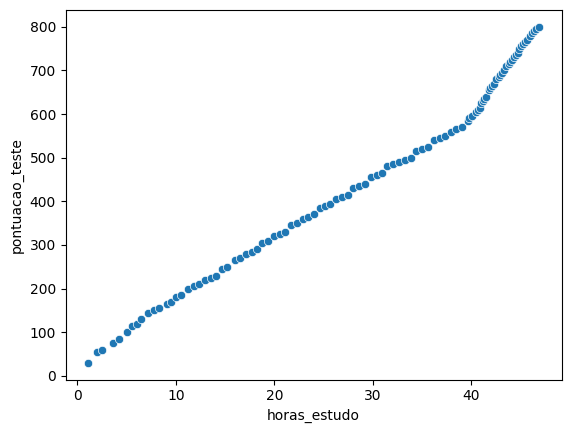

In [63]:
# Plot de Dispersão
# X = horas_estudo
# Y = pontuacao_teste

sns.scatterplot(data=df, x=df['horas_estudo'], y=df['pontuacao_teste'])

<Axes: ylabel='horas_estudo'>

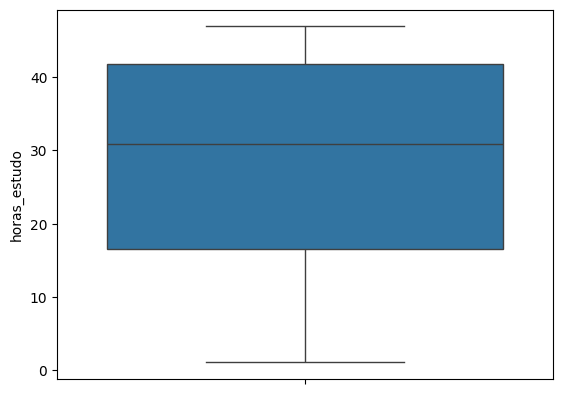

In [64]:
# Verificar se temos outliers
# Plot BoxPlot

sns.boxplot(df, y=df['horas_estudo'])

<Axes: ylabel='pontuacao_teste'>

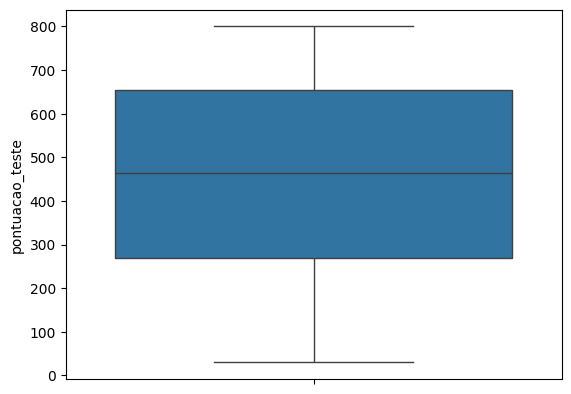

In [65]:
sns.boxplot(df, y=df['pontuacao_teste'])

<Axes: >

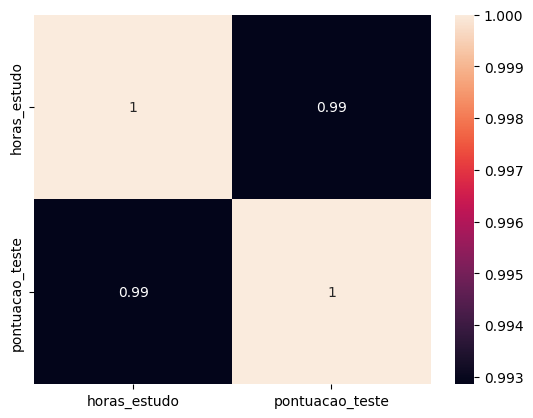

In [66]:
# Verificar Correlação - Pearson
sns.heatmap(df.corr('pearson'),annot=True)

<Axes: xlabel='horas_estudo', ylabel='Count'>

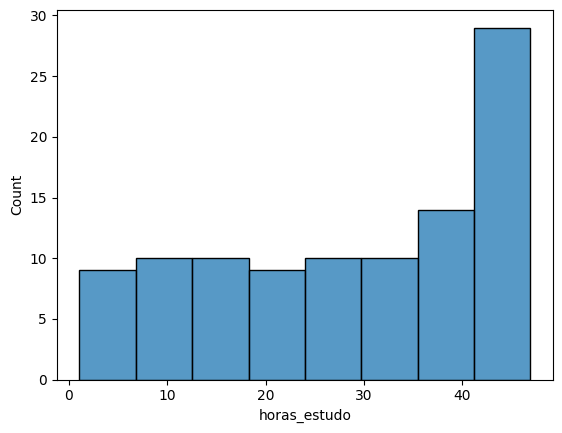

In [67]:
sns.histplot(df,x='horas_estudo')

<Axes: xlabel='pontuacao_teste', ylabel='Count'>

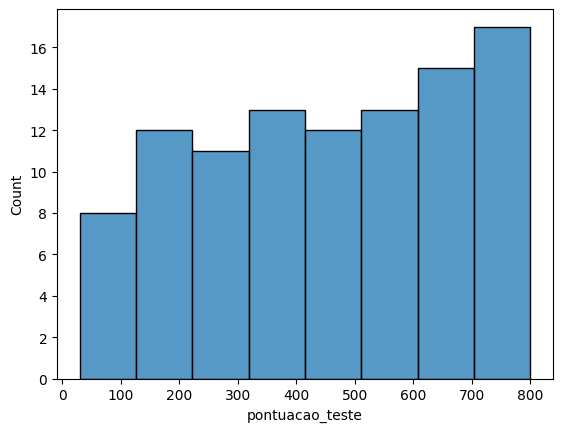

In [68]:
sns.histplot(df,x='pontuacao_teste')

### Treinar Modelo

In [69]:
# Dividir dataset entre treino e teste
X = df['horas_estudo'].values.reshape(-1,1)
y = df['pontuacao_teste'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=50)

In [70]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()


In [71]:
# Treinar o modelo
reg_model.fit(X_train,y_train)

LinearRegression()

In [72]:
# Imprimir a equação da reta
# y = ax + b
print("A equação da reta é = y{:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é = y15.642619x + 8.476601


## Validar Modelo - Métricas

In [73]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [74]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.9828400452912442

In [75]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

22.957470277134615

In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

766.9972992416427

import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred))

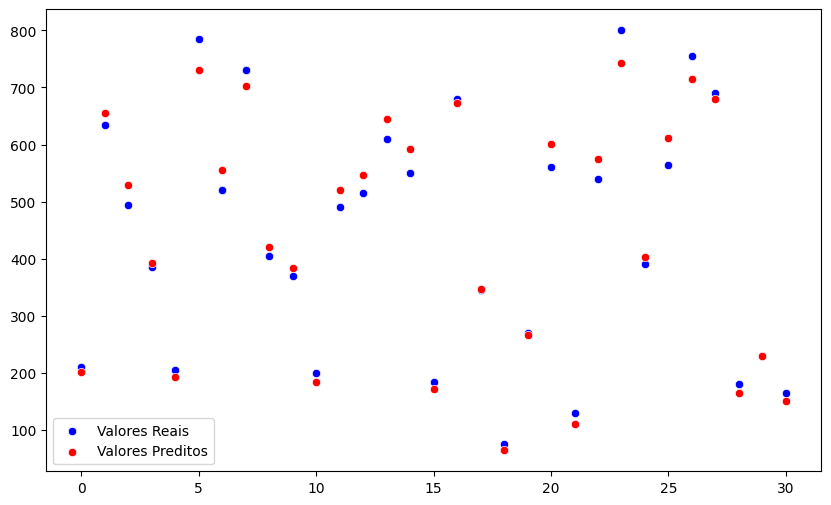

In [77]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))

sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')

plt.legend()
plt.show()


# Análise de Resíduos

In [78]:
# Calcular residuos

residuos = y_test - y_pred

In [79]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - média)/ desvio_padrao
from scipy.stats import zscore

residuos_std = zscore(residuos)

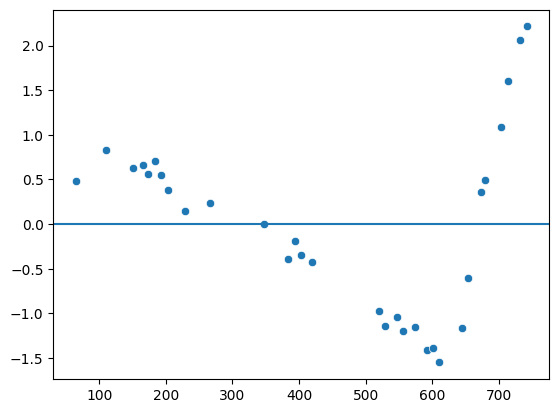

In [80]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e +2 (na escala padrão) - indica linearidade

# Verificar homogeneidade das variâncias (homocedasticidade)
# Se os valores que estiverem em torno da reta, temos homocedasticidade, caso contrário
# se for obsevado um padrão (forma um cone, funil) há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

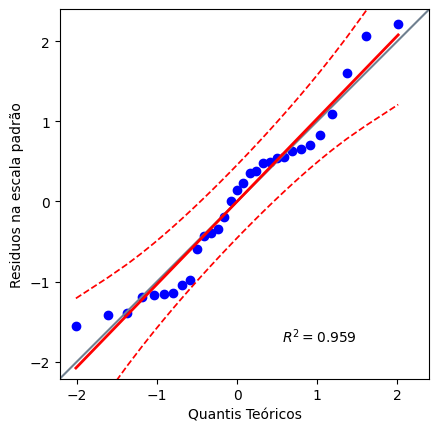

In [81]:
# Checar se residuos seguem uma distribuição normal
# QQ (Quantile-Quantile) plt, que avalia se uma amostra segue uma distribuição normal
import pingouin as pg

pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

In [82]:
from scipy.stats import shapiro

stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-valor: {}".format(stat_shapiro,p_valor_shapiro))

Estatística do teste: 0.9500532226161759 e P-valor: 0.15663817850304967


In [83]:
from scipy.stats import kstest
stat_ks, p_valor_ks = kstest(residuos.reshape(-1),'norm')
print("Estatística do teste: {} e P-valor: {}".format(stat_ks,p_valor_ks))

Estatística do teste: 0.48355808450512827 e P-valor: 3.395368995814077e-07


## Predições

In [84]:
# Se eu estudar 30.4 horas, qual a pontuação prevista pelo modelo?
reg_model.predict([[30.4]])

array([[484.01220436]])

In [85]:
# Eu quero tirar 600 pontos, quantas horas eu tenho q estudar? *(usar equação da reta) y = ax + b

(600 - reg_model.intercept_[0])/reg_model.coef_[0][0]


37.81485802710669

## Salvar o modelo para usar depois

In [87]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']